# Data and libraries

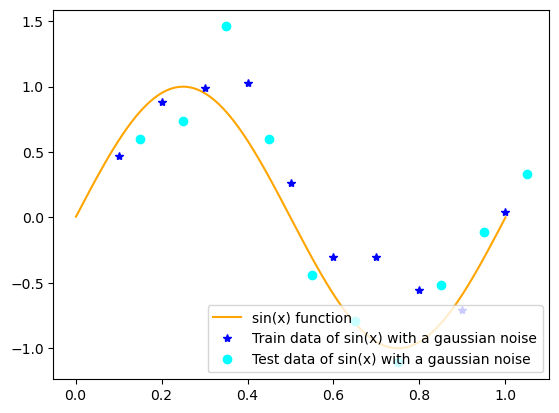

In [1]:
#Data
import math
import numpy as np
import matplotlib.pyplot as plt

x = []
t = []

test =[]
testT=[]

y = []
siny = []

for i in range(1,1001):
  y.append(i/1000)
for i in range(0,1000):
  siny.append(math.sin(y[i]*2*math.pi))

for i in range(1,11):
  x.append(i/10)
  test.append(1/20 + i/10)
for i in range(0,10):
  t.append(math.sin(x[i]*2*math.pi))
  testT.append(math.sin(test[i]*2*math.pi))

noise = np.random.normal(0,0.25, len(x))
t = t + noise
noise = np.random.normal(0,0.25, len(test))
testT = testT + noise


fig, ax = plt.subplots()
ax.plot(y,siny, color ="orange", label = "sin(x) function")
ax.plot(x,t,"*", color = "blue", label = "Train data of sin(x) with a gaussian noise")
ax.plot(test, testT, "o", color = "cyan", label = "Test data of sin(x) with a gaussian noise")
plt.legend(loc='lower right')
plt.show()

# Gaussian Basis

In [2]:
#Gaussian density and basis for the bayesian curve

def phiJ(x,mu,sigma,J):
  return math.exp(-(x-mu[J])**2/(2*sigma**2))

def phiX(x,mu,sigma):
  phi = np.zeros(len(mu)+1)
  phi[0] = 1
  for j in range(len(mu)):
    phi[j+1] = phiJ(x,mu,sigma,j)
  return phi

In [3]:
# 9 basis functions, 8 Gaussian functions
mu = []
sigma = math.sqrt(1/8)

for i in range(8):
  mu.append(i/8)

In [4]:
#parameters

alpha = 0.005
beta = 11.1
I = np.identity(9)

#desing matrix PHI
#basis 1, Phi(1), ... , Phi(8)

PHI = np.zeros((len(x),9))

for i in range(len(x)):
  PHI[i,0] = 1
  for j in range(8):
    PHI[i, j+1] = phiJ(x[i], mu, sigma, j)
    
#Mean m_N and varianzce matrix S_N

S_N = np.linalg.pinv(alpha*I + beta*PHI.T@PHI)
m_N = beta*S_N@PHI.T@t

#prediction values and variance of the prediction
MN = []
S1 = []
S2 = []

for i in range(len(y)):
  val = m_N.T@phiX(y[i], mu, sigma)
  sig = 1/beta + phiX(y[i], mu, sigma).T@S_N@phiX(y[i], mu, sigma)
  S1.append(val + math.sqrt(sig))
  S2.append(val - math.sqrt(sig))
  MN.append(val)

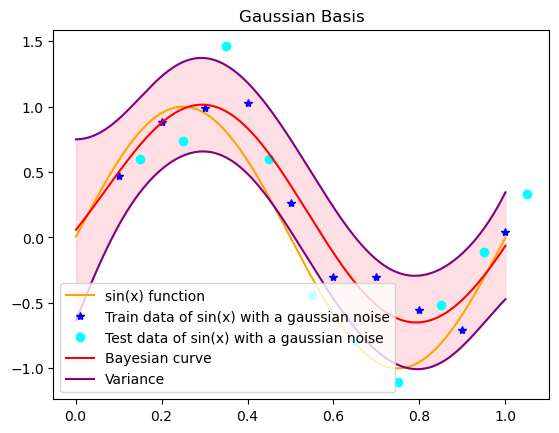

In [5]:
#Graph of results

fig, ax = plt.subplots()
ax.plot(y,siny, color ="orange", label = "sin(x) function")
ax.plot(x,t,"*", color ="blue", label = "Train data of sin(x) with a gaussian noise")
ax.plot(test, testT, "o", color = "cyan", label = "Test data of sin(x) with a gaussian noise")
ax.plot(y,MN, color = "red", label = "Bayesian curve")
ax.plot(y,S1, color ='purple', label = "Variance")
ax.plot(y,S2, color ='purple')
plt.fill_between(y, S1, S2, color='pink', alpha=0.5)
ax.set_title("Gaussian Basis")
plt.legend(loc='lower left')
plt.show()

# Sigmoidal Curve

In [6]:
#Sigmoidal density and basis for the bayesian curve

def sigJ(x,mu,sigma,J):
  return 1/(1 + math.exp(-(x-mu[J])/sigma))


def sigX(x,mu,sigma):
  sig = np.zeros(len(mu)+1)
  sig[0] = 1
  for j in range(len(mu)):
    sig[j+1] = sigJ(x,mu,sigma,j)
  return sig

In [7]:
# 9 basis functions, 8 Sigmoidal functions
mu = []
sigma = math.sqrt(1/8)

for i in range(8):
  mu.append(i/8)

In [8]:
#Parameters

alpha = 0.005
beta = 11.1
I = np.identity(9)

#desing matrix PHI
#basis 1, sig(1), ... , sig(8)

PHI = np.zeros((len(x),9))

for i in range(len(x)):
  PHI[i,0] = 1
  for j in range(8):
    PHI[i, j+1] = sigJ(x[i], mu, sigma, j)
    
#Mean m_N and varianzce matrix S_N

S_N = np.linalg.pinv(alpha*I + beta*PHI.T@PHI)
m_N = beta*S_N@PHI.T@t

#prediction values and variance of the prediction
MN = []
S1 = []
S2 = []

for i in range(len(y)):
  val = m_N.T@sigX(y[i], mu, sigma)
  sig = 1/beta + sigX(y[i], mu, sigma).T@S_N@sigX(y[i], mu, sigma)
  S1.append(val + math.sqrt(sig))
  S2.append(val - math.sqrt(sig))
  MN.append(val)

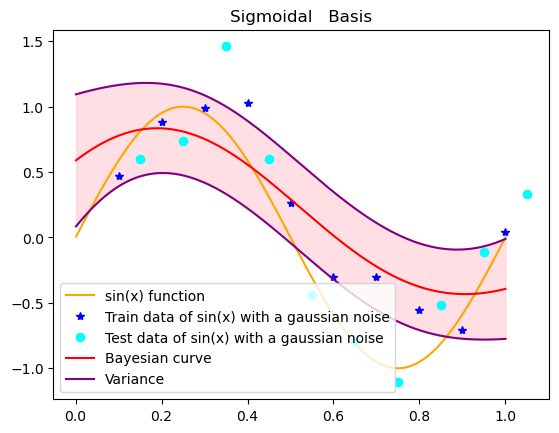

In [9]:
#Graphical Results 

fig, ax = plt.subplots()
ax.plot(y,siny, color ="orange", label = "sin(x) function")
ax.plot(x,t,"*", color ="blue", label = "Train data of sin(x) with a gaussian noise")
ax.plot(test, testT, "o", color = "cyan", label = "Test data of sin(x) with a gaussian noise")
ax.plot(y,MN, color = "red", label = "Bayesian curve")
ax.plot(y,S1, color ='purple', label = "Variance")
ax.plot(y,S2, color ='purple')
plt.fill_between(y, S1, S2, color='pink', alpha=0.5)
ax.set_title("Sigmoidal   Basis")
plt.legend(loc='lower left')
plt.show()